In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import seaborn as sns

In [2]:
data_filename = '/home/miminari/repos/airbnb_analysis/Airbnb_Open_Data.csv'

In [3]:
data = pd.read_csv(data_filename, low_memory=False)

# Brief Data Overview

In [4]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
data

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
data.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [8]:
data.isna().sum().sort_values(ascending=False)

license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host id         

In [9]:
missing_percentages = data.isna().sum().sort_values(ascending=False) / len(data)
missing_percentages

license                           0.999981
house_rules                       0.508104
last review                       0.154904
reviews per month                 0.154768
country                           0.005185
availability 365                  0.004367
minimum nights                    0.003986
host name                         0.003957
review rate number                0.003177
calculated host listings count    0.003109
host_identity_verified            0.002817
service fee                       0.002661
NAME                              0.002437
price                             0.002407
Construction year                 0.002086
number of reviews                 0.001784
country code                      0.001277
instant_bookable                  0.001023
cancellation_policy               0.000741
neighbourhood group               0.000283
neighbourhood                     0.000156
long                              0.000078
lat                               0.000078
id         

In [10]:
missing_percentages[missing_percentages != 0]

license                           0.999981
house_rules                       0.508104
last review                       0.154904
reviews per month                 0.154768
country                           0.005185
availability 365                  0.004367
minimum nights                    0.003986
host name                         0.003957
review rate number                0.003177
calculated host listings count    0.003109
host_identity_verified            0.002817
service fee                       0.002661
NAME                              0.002437
price                             0.002407
Construction year                 0.002086
number of reviews                 0.001784
country code                      0.001277
instant_bookable                  0.001023
cancellation_policy               0.000741
neighbourhood group               0.000283
neighbourhood                     0.000156
long                              0.000078
lat                               0.000078
dtype: floa

<Axes: >

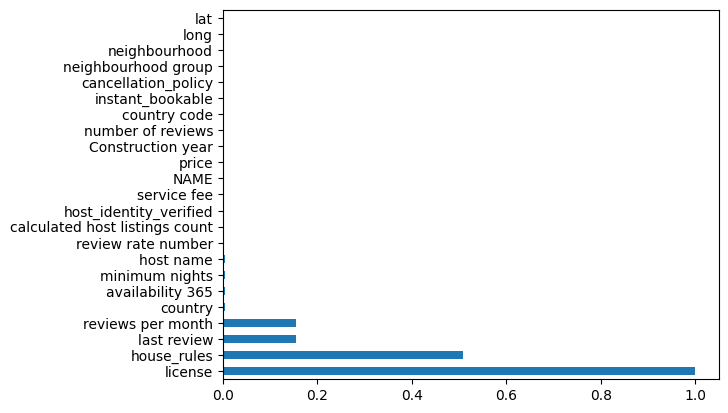

In [11]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

In [12]:
data = data.drop(columns=['license'])

In [13]:
data.shape

(102599, 25)

# Data Cleaning

In [35]:
def decontractions(phrase: str)->str:
    map_list = [
        # specific
        ["won't", "will not"],
        ["can't", "can not"],
        ["won’t", "will not"],
        ["can’t", "can not"],
        
        # general
        ["n't", " not"],
        ["'re", " are"],
        ["'s", " is"],
        ["'d", " would"],
        ["'ll", " will"],
        ["'t", " not"],
        ["'ve", " have"],
        ["'m", " am"],
        ["n’t", " not"],
        ["’re", " are"],
        ["’s", " is"],
        ["’d", " would"],
        ["’ll", " will"],
        ["’t", " not"],
        ["’ve", " have"],
        ["’m", " am"],
        [" w ", " with "]
    ]
    
    for amap in map_list:
        phrase = re.sub(amap[0], amap[1], phrase)
    return phrase

In [36]:
def preprocess(series_column: pd.Series, remove_stopwords: bool)->list:
    preprocessed = []
    characters_to_remove = ['\\r', '\\"', '\\n']
    for sentence in tqdm(series_column.values):
        sentence=str(sentence)
        for char in characters_to_remove:
            sentence = sentence.replace(char, ' ')
        # Replace characters between words with space
        sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
        sentence=decontractions(sentence)
        
        if remove_stopwords:
            sentence = ' '.join(sent for sent in sentence.split() if sent not in stopwords.words())
        else:
            sentence = ' '.join(sent for sent in sentence.split())
        preprocessed.append(sentence.lower().strip())
    return preprocessed

### house_rules

In [15]:
data['missing_house_rules']= data['house_rules'].isna()

In [16]:
data['missing_house_rules'].head()

0    False
1    False
2    False
3     True
4    False
Name: missing_house_rules, dtype: bool

In [17]:
data['clean_house_rules'] = preprocess(data['house_rules'], False)
del data['house_rules']

100%|██████████| 102599/102599 [00:02<00:00, 45835.18it/s]


### last review

In [18]:
data['clean_last_review']= pd.to_datetime(data['last review'], format='%m/%d/%Y')
del data['last review']

In [19]:
data['clean_last_review'].head(10)

0   2021-10-19
1   2022-05-21
2          NaT
3   2019-07-05
4   2018-11-19
5   2019-06-22
6   2017-10-05
7   2017-10-05
8   2019-06-24
9   2017-07-21
Name: clean_last_review, dtype: datetime64[ns]

In [20]:
data.sort_values(by='clean_last_review', ascending=False, inplace=True)

In [21]:
# Removing outliers
data= data[data['clean_last_review']<'2023-08-16']

In [22]:
df= data[['clean_last_review', 'id']].groupby('clean_last_review').count().reset_index()

In [23]:
df.head(10)

,clean_last_review,id
0,2012-07-11,2
1,2012-08-10,2
2,2012-08-25,2
3,2012-09-05,2
4,2012-09-14,2
5,2012-09-18,4
6,2012-09-23,2
7,2012-11-01,2
8,2012-11-10,2
9,2012-12-12,2


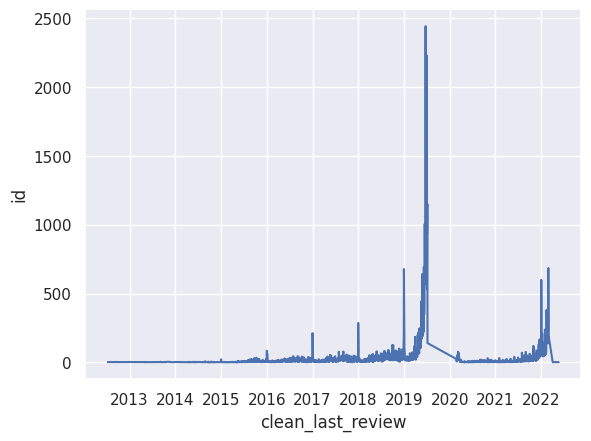

In [24]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='clean_last_review', y='id', data=df)
plt.show()

In [25]:
data.shape

(86701, 26)

In [26]:
data = data.dropna()

In [27]:
data.shape

(83878, 26)

### Duplicates

In [28]:
data.duplicated().sum()

466

In [29]:
data.drop_duplicates(inplace=True, keep= 'first')

In [32]:
data['id'].unique().shape

(83412,)

### NAME

In [34]:
data['NAME']

1                                   Skylit Midtown Castle
1099                       Large Room w/ Private Entrance
69275                      Large Room w/ Private Entrance
784                              Amazing West Village 2br
69309    Rent in beautiful Sunnyside Gardens for holidays
                               ...                       
1464                  Lovely 2-room Studio in Crown Hghts
1343     Great find- 2 bedroom apartment in Williamsburg!
69519    Great find- 2 bedroom apartment in Williamsburg!
1294       Charming old school 1BR in C. Gardens Brooklyn
69470      Charming old school 1BR in C. Gardens Brooklyn
Name: NAME, Length: 83412, dtype: object

In [38]:
data['clean_accomodation_info']=preprocess(data['NAME'], False)
del data['NAME']

100%|██████████| 83412/83412 [00:02<00:00, 30634.50it/s]


### host id

In [42]:
data['host id'].unique().shape
del data['host id']

### host_identity_verified

In [43]:
data['host_identity_verified'].unique()

array(['verified', 'unconfirmed'], dtype=object)

In [44]:
def host_identity_verified(text: str)-> bool:
    return True if text=='verified' else False

In [46]:
data['host_identity_verified']=data['host_identity_verified'].apply(host_identity_verified)

In [47]:
del data['host name']

### neighbourhood group

In [48]:
data['neighbourhood group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island',
       'brookln'], dtype=object)

In [49]:
data.loc[(data['neighbourhood group']=='brookln'),'neighbourhood group'] = 'Brooklyn'

In [50]:
del data['neighbourhood']

### country

In [52]:
data['country'].unique()

array(['United States'], dtype=object)

In [65]:
del data['country']

KeyError: 'country'

In [56]:
del data['country code']

### instant_bookable

In [57]:
data['instant_bookable'].unique()

array([False, True], dtype=object)

In [58]:
data['instant_bookable'] = data['instant_bookable'].astype(bool)

### price and fees

In [59]:
for col in ['price', 'service fee']:
    data[col] = data[col].apply(lambda value: float(str(value).replace('$', '').replace(',', '')))

In [60]:
data.head()

,id,host_identity_verified,neighbourhood group,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,...,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,missing_house_rules,clean_house_rules,clean_last_review,clean_accomodation_info
1,1002102,True,Manhattan,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,142.0,...,30.0,45.0,0.38,4.0,2.0,228.0,False,pet friendly but please confirm with me if the...,2022-05-21,skylit midtown castle
1099,1608314,True,Brooklyn,40.68905,-73.95410,True,flexible,Private room,2003.0,170.0,...,7.0,2.0,0.02,5.0,3.0,158.0,False,this is a residential property and quiet is ma...,2022-05-05,large room with private entrance
69275,39261919,False,Brooklyn,40.68905,-73.95410,False,strict,Private room,2003.0,170.0,...,7.0,2.0,0.02,5.0,3.0,0.0,True,nan,2022-05-05,large room with private entrance
784,1434339,False,Manhattan,40.73879,-74.00425,True,moderate,Entire home/apt,2015.0,706.0,...,27.0,1.0,0.01,5.0,1.0,414.0,False,1 no additional guests without the expressed w...,2022-05-04,amazing west village 2br
69309,39280697,True,Queens,40.74679,-73.91853,False,moderate,Private room,2021.0,343.0,...,3.0,1.0,0.01,2.0,1.0,330.0,True,nan,2022-04-04,rent in beautiful sunnyside gardens for holidays


### Construction year	

In [61]:
data['construction_year']= data['Construction year'].apply(int)

In [63]:
del data['Construction year']

In [64]:
data.head()

,id,host_identity_verified,neighbourhood group,lat,long,instant_bookable,cancellation_policy,room type,price,service fee,...,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,missing_house_rules,clean_house_rules,clean_last_review,clean_accomodation_info,construction_year
1,1002102,True,Manhattan,40.75362,-73.98377,False,moderate,Entire home/apt,142.0,28.0,...,45.0,0.38,4.0,2.0,228.0,False,pet friendly but please confirm with me if the...,2022-05-21,skylit midtown castle,2007
1099,1608314,True,Brooklyn,40.68905,-73.95410,True,flexible,Private room,170.0,34.0,...,2.0,0.02,5.0,3.0,158.0,False,this is a residential property and quiet is ma...,2022-05-05,large room with private entrance,2003
69275,39261919,False,Brooklyn,40.68905,-73.95410,False,strict,Private room,170.0,34.0,...,2.0,0.02,5.0,3.0,0.0,True,nan,2022-05-05,large room with private entrance,2003
784,1434339,False,Manhattan,40.73879,-74.00425,True,moderate,Entire home/apt,706.0,141.0,...,1.0,0.01,5.0,1.0,414.0,False,1 no additional guests without the expressed w...,2022-05-04,amazing west village 2br,2015
69309,39280697,True,Queens,40.74679,-73.91853,False,moderate,Private room,343.0,69.0,...,1.0,0.01,2.0,1.0,330.0,True,nan,2022-04-04,rent in beautiful sunnyside gardens for holidays,2021


### cancellation_policy

In [66]:
data['cancellation_policy'].unique()

array(['moderate', 'flexible', 'strict'], dtype=object)

### room type	

In [67]:
data['room type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [68]:
data['room type'] = data['room type'].apply(lambda value: str(value).replace('/', ' '))

In [69]:
data.head()

,id,host_identity_verified,neighbourhood group,lat,long,instant_bookable,cancellation_policy,room type,price,service fee,...,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,missing_house_rules,clean_house_rules,clean_last_review,clean_accomodation_info,construction_year
1,1002102,True,Manhattan,40.75362,-73.98377,False,moderate,Entire home apt,142.0,28.0,...,45.0,0.38,4.0,2.0,228.0,False,pet friendly but please confirm with me if the...,2022-05-21,skylit midtown castle,2007
1099,1608314,True,Brooklyn,40.68905,-73.95410,True,flexible,Private room,170.0,34.0,...,2.0,0.02,5.0,3.0,158.0,False,this is a residential property and quiet is ma...,2022-05-05,large room with private entrance,2003
69275,39261919,False,Brooklyn,40.68905,-73.95410,False,strict,Private room,170.0,34.0,...,2.0,0.02,5.0,3.0,0.0,True,nan,2022-05-05,large room with private entrance,2003
784,1434339,False,Manhattan,40.73879,-74.00425,True,moderate,Entire home apt,706.0,141.0,...,1.0,0.01,5.0,1.0,414.0,False,1 no additional guests without the expressed w...,2022-05-04,amazing west village 2br,2015
69309,39280697,True,Queens,40.74679,-73.91853,False,moderate,Private room,343.0,69.0,...,1.0,0.01,2.0,1.0,330.0,True,nan,2022-04-04,rent in beautiful sunnyside gardens for holidays,2021


### Histograms

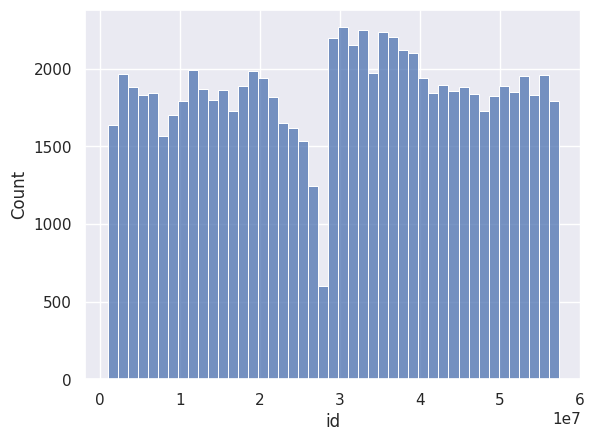

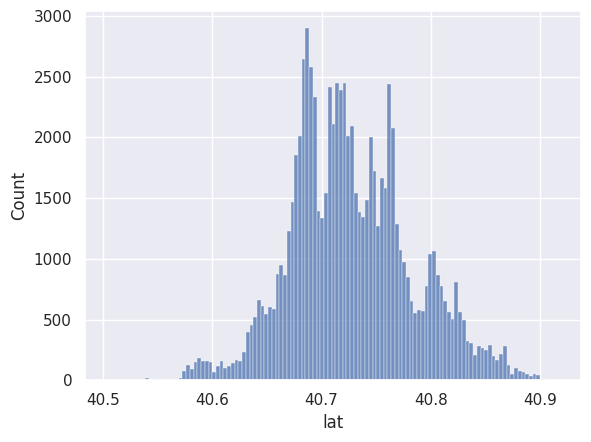

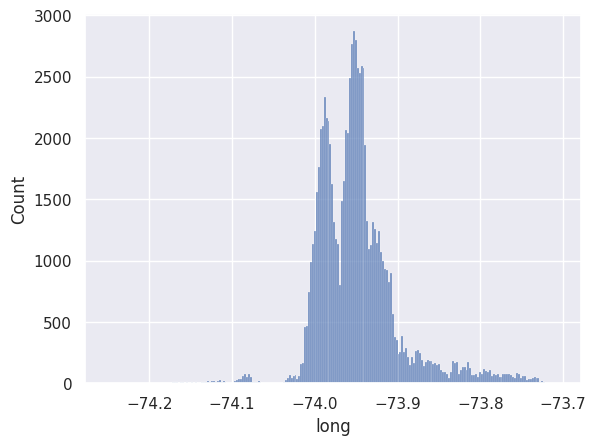

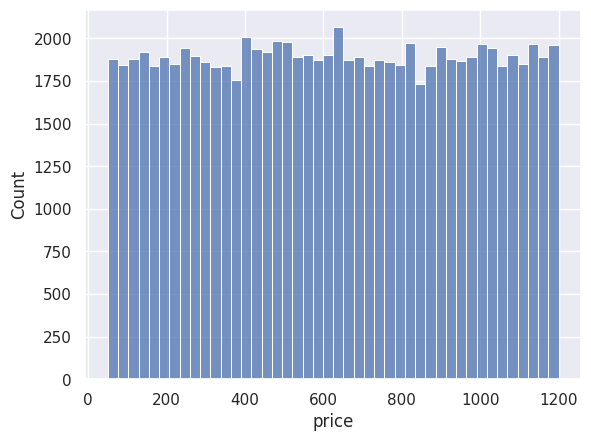

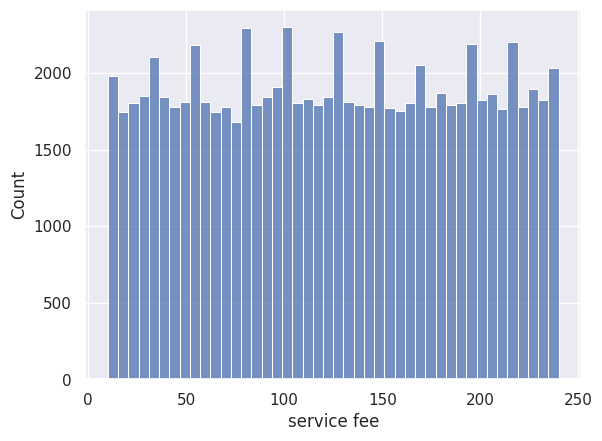

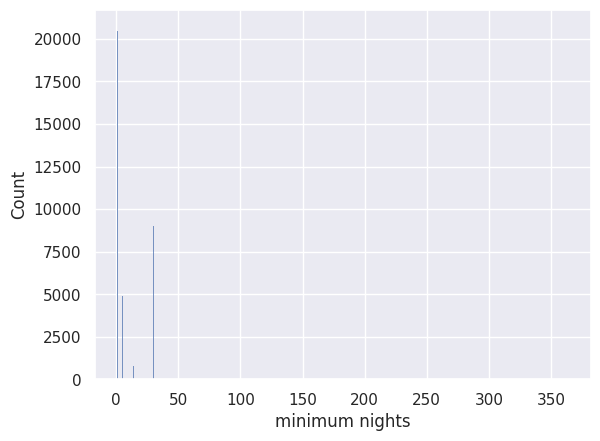

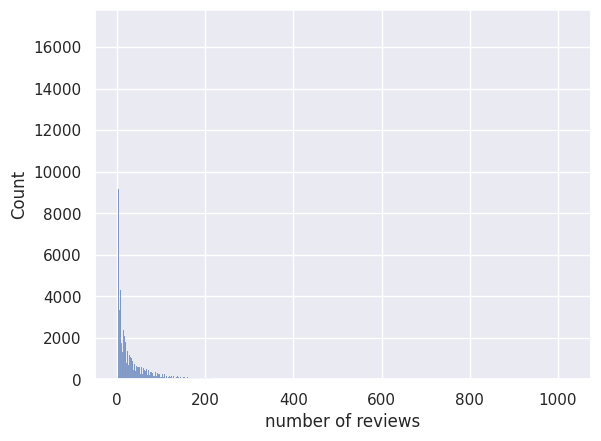

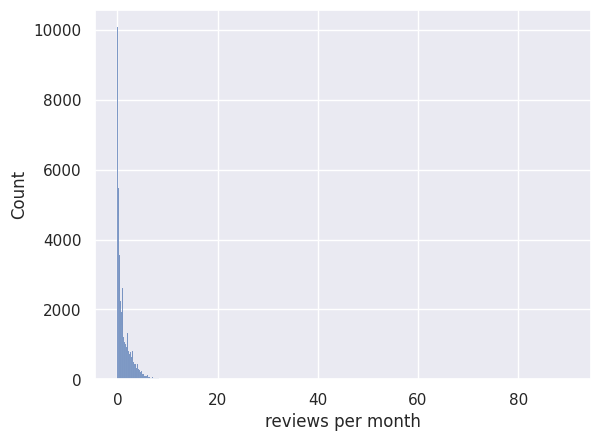

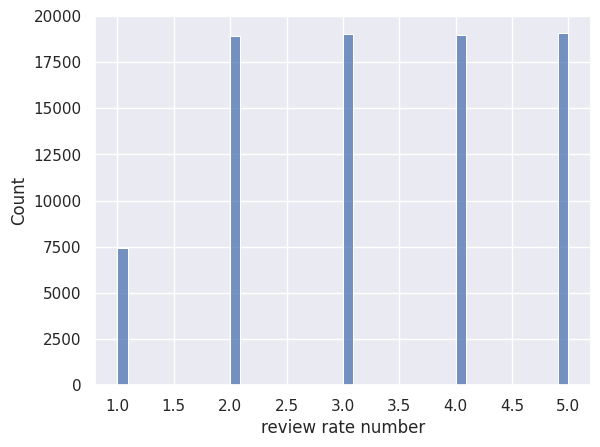

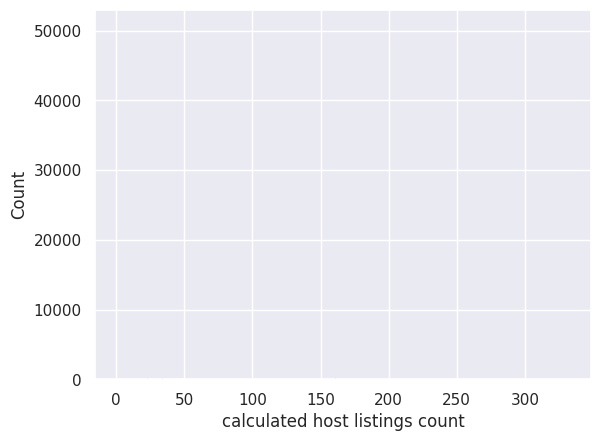

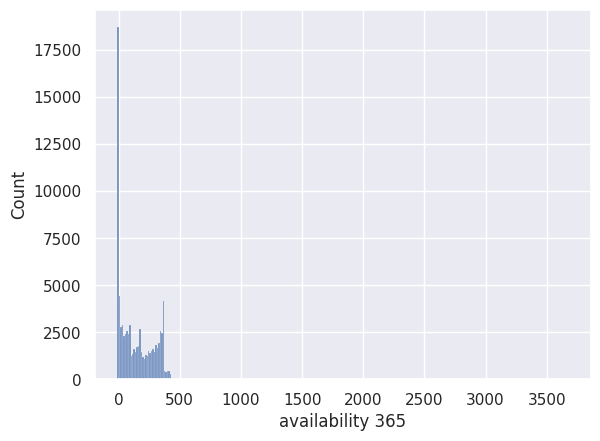

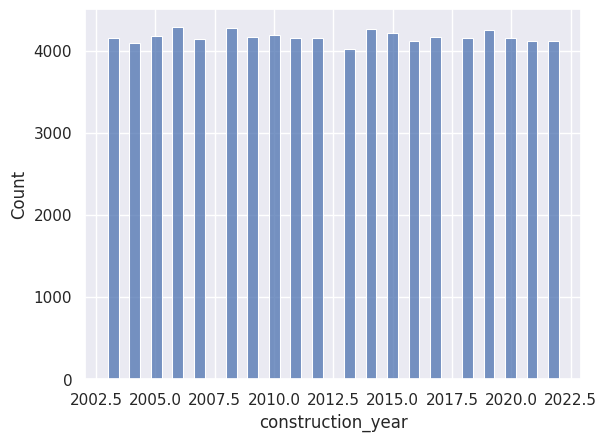

In [74]:
num_cols = list(data.select_dtypes(['int64', 'float64']).columns)
data = data[(data['minimum nights']>0)&(data['minimum nights']<365)]
for col in num_cols:
    sns.histplot(data=data, x=col)
    plt.show()

In [71]:
data['minimum nights'].max()

5645.0

In [72]:
data['minimum nights'].min()

-365.0

In [73]:
data['minimum nights'].mode()

0    2.0
Name: minimum nights, dtype: float64